# Slice data for Diyaa

- **Developed by**: Alexandra Cirnu
- **Modified by**: Alexandra Cirnu
- **Talavera-López Lab - Würzburg Institute for Systems Immunology - Faculty of Medicine - Julius Maximilian Universität Würzburg**
- **Created on**: 241213
- **Last modified**: 241213

#### Environment: milopy

In [14]:
import scanpy as sc
import pandas as pd
import pertpy as pt
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import numpy as np
import scvi
from scipy.sparse import csr_matrix
import muon as mu
from muon import atac as ac
from muon import prot

In [21]:
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_versions()

sc.settings.set_figure_params(dpi = 180, color_map = 'magma_r', dpi_save = 300, vector_friendly = True, format = 'svg')
%matplotlib inline

-----
anndata     0.10.7
scanpy      1.9.8
-----
CoreFoundation              NA
Foundation                  NA
PIL                         10.3.0
PyObjCTools                 NA
absl                        NA
adjustText                  1.1.1
anyio                       NA
appnope                     0.1.4
arrow                       1.3.0
arviz                       0.18.0
asttokens                   NA
attr                        23.2.0
attrs                       23.2.0
babel                       2.14.0
blitzgsea                   NA
brotli                      1.1.0
certifi                     2024.02.02
cffi                        1.16.0
chardet                     5.2.0
charset_normalizer          3.3.2
chex                        0.1.86
colorama                    0.4.6
comm                        0.2.2
contextlib2                 NA
custom_inherit              2.4.1
cycler                      0.12.1
cython_runtime              NA
dateutil                    2.9.0
debugpy      

In [15]:
sc.logging.print_versions()

-----
anndata     0.10.7
scanpy      1.9.8
-----
CoreFoundation              NA
Foundation                  NA
PIL                         10.3.0
PyObjCTools                 NA
absl                        NA
adjustText                  1.1.1
anyio                       NA
appnope                     0.1.4
arrow                       1.3.0
arviz                       0.18.0
asttokens                   NA
attr                        23.2.0
attrs                       23.2.0
babel                       2.14.0
blitzgsea                   NA
brotli                      1.1.0
certifi                     2024.02.02
cffi                        1.16.0
chardet                     5.2.0
charset_normalizer          3.3.2
chex                        0.1.86
colorama                    0.4.6
comm                        0.2.2
contextlib2                 NA
custom_inherit              2.4.1
cycler                      0.12.1
cython_runtime              NA
dateutil                    2.9.0
debugpy      

#### Load in data

In [16]:
input = '/Users/alex/github/ACM_Mouse_Immune/Workflow/5_Leiden_clustering+annotation_on_all_conditions/C_merge_lymphoids+myeloids/ACM_annotated_muon_ac240727.raw.h5mu'
mdata_data = mu.read_h5mu(input)
mdata_data

/Users/alex/miniforge3/envs/milopy/lib/python3.10/site-packages/anndata/_core/anndata.py:430: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(
/Users/alex/miniforge3/envs/milopy/lib/python3.10/site-packages/anndata/_core/anndata.py:430: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(


MuData object with n_obs × n_vars = 44586 × 29477
  var:	'gene_ids', 'feature_types'
  2 modalities
    rna:	44586 x 29378
      obs:	'cell_source', 'donor', 'n_counts', 'sample', 'condition', 'genotype', 'infection', 'library', 'model', 'n_genes_by_counts', 'total_counts', 'doublet_scores', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'percent_mt', 'percent_chrY', 'XIST-counts', 'S_score', 'G2M_score', '_scvi_batch', '_scvi_labels', 'batch', 'leiden', 'classification', 'phenotype', 'annotation', 'lineage', 'general_celltype'
      var:	'gene_ids', 'feature_types', 'mt', 'ribo'
      obsm:	'X_pca', 'X_scANVI', 'X_scVI', 'X_umap', '_scvi_extra_categorical_covs'
      obsp:	'connectivities', 'distances'
    prot:	44586 x 99
      obs:	'library', 'batch', 'lineage'
      var:	'gene_ids', 'feature_types'
      uns:	'neighbors', 'pca', 'umap'
      obsm:	'X_pca', 'X_umap'
      varm:	'PCs'
      layers:	'counts', 'log_norm'

In [17]:
adata = mdata_data.mod["rna"]
adata = adata[adata.obs['condition'].isin(["Pkp2_Ctr_noninf", "Pkp2_Ctr_MCMV", "Ttn_Ctr_noninf", "Ttn_Ctr_MCMV"]) , :]
adata

View of AnnData object with n_obs × n_vars = 18362 × 29378
    obs: 'cell_source', 'donor', 'n_counts', 'sample', 'condition', 'genotype', 'infection', 'library', 'model', 'n_genes_by_counts', 'total_counts', 'doublet_scores', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'percent_mt', 'percent_chrY', 'XIST-counts', 'S_score', 'G2M_score', '_scvi_batch', '_scvi_labels', 'batch', 'leiden', 'classification', 'phenotype', 'annotation', 'lineage', 'general_celltype'
    var: 'gene_ids', 'feature_types', 'mt', 'ribo'
    obsm: 'X_pca', 'X_scANVI', 'X_scVI', 'X_umap', '_scvi_extra_categorical_covs'
    obsp: 'connectivities', 'distances'

In [18]:
adata.obs

,cell_source,donor,n_counts,sample,condition,genotype,infection,library,model,n_genes_by_counts,...,G2M_score,_scvi_batch,_scvi_labels,batch,leiden,classification,phenotype,annotation,lineage,general_celltype
AAACGCTGTTGTGTTG-1-A1,AG_Gerull,Pkp2_Ctr_noninf_1,478.0,Pkp2_Ctr_noninf_1,Pkp2_Ctr_noninf,Pkp2_Ctr,noninf,A1,Pkp2,365.0,...,-0.083225,6,8,reference,3,MØ_Elmo1+,pro-inflammatory,MØ_Elmo1+,myeloid,Dock4+_MØ
AAACGCTTCTCGCTCA-1-A1,AG_Gerull,Pkp2_Ctr_noninf_1,3581.0,Pkp2_Ctr_noninf_1,Pkp2_Ctr_noninf,Pkp2_Ctr,noninf,A1,Pkp2,1599.0,...,-0.390143,6,8,reference,3,MØ_Elmo1+,pro-inflammatory,MØ_Elmo1+,myeloid,Dock4+_MØ
AAAGGTACAGAACATA-1-A1,AG_Gerull,Pkp2_Ctr_noninf_2,16539.0,Pkp2_Ctr_noninf_2,Pkp2_Ctr_noninf,Pkp2_Ctr,noninf,A1,Pkp2,3854.0,...,-0.578955,7,6,reference,6,Mono_Cd14+Ly6c+,pro-inflammatory,Mono_Cd14+Ly6c+,myeloid,Monocyte
AAAGTCCAGGGACACT-1-A1,AG_Gerull,Pkp2_Ctr_noninf_2,13389.0,Pkp2_Ctr_noninf_2,Pkp2_Ctr_noninf,Pkp2_Ctr,noninf,A1,Pkp2,3788.0,...,-0.370084,7,10,reference,2,MØ_Mertk+Il10+,anti-inflammatory,MØ_Mertk+Il10+,myeloid,MØ_general
AAAGTCCCAGTAGGAC-1-A1,AG_Gerull,Pkp2_Ctr_noninf_2,12092.0,Pkp2_Ctr_noninf_2,Pkp2_Ctr_noninf,Pkp2_Ctr,noninf,A1,Pkp2,3493.0,...,-0.357287,7,10,reference,2,MØ_Mertk+Il10+,anti-inflammatory,MØ_Mertk+Il10+,myeloid,MØ_general
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTCACAAGCTAAACA-1-B2,AG_Gerull,Ttn_Ctr_noninf_1,9368.0,Ttn_Ctr_noninf_1,Ttn_Ctr_noninf,Ttn_Ctr,noninf,B2,Ttn,3140.0,...,-0.670969,23,29,query,6,Th17_Cd4+,pro-inflammatory,Th17_Cd4+,lymphoid,Cd4_T_cell
TTTCACAGTCCGAAGA-1-B2,AG_Gerull,Ttn_Ctr_MCMV_2,5329.0,Ttn_Ctr_MCMV_2,Ttn_Ctr_MCMV,Ttn_Ctr,MCMV,B2,Ttn,1587.0,...,-0.104751,21,21,query,7,Tem_Cd8+,pro-inflammatory,Tem_Cd8+,lymphoid,Cd8_T_cell
TTTCGATTCGGTCACG-1-B2,AG_Gerull,Ttn_Ctr_MCMV_3,1610.0,Ttn_Ctr_MCMV_3,Ttn_Ctr_MCMV,Ttn_Ctr,MCMV,B2,Ttn,825.0,...,-0.357967,22,24,query,16,Treg,pro-inflammatory,Treg,lymphoid,Cd4_T_cell
TTTGACTTCAGATTGC-1-B2,AG_Gerull,Ttn_Ctr_MCMV_1,8505.0,Ttn_Ctr_MCMV_1,Ttn_Ctr_MCMV,Ttn_Ctr,MCMV,B2,Ttn,2510.0,...,-0.624749,20,25,query,4,γδT,pro-inflammatory,γδT,lymphoid,Cd8_T_cell


/Users/alex/miniforge3/envs/milopy/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/Users/alex/miniforge3/envs/milopy/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


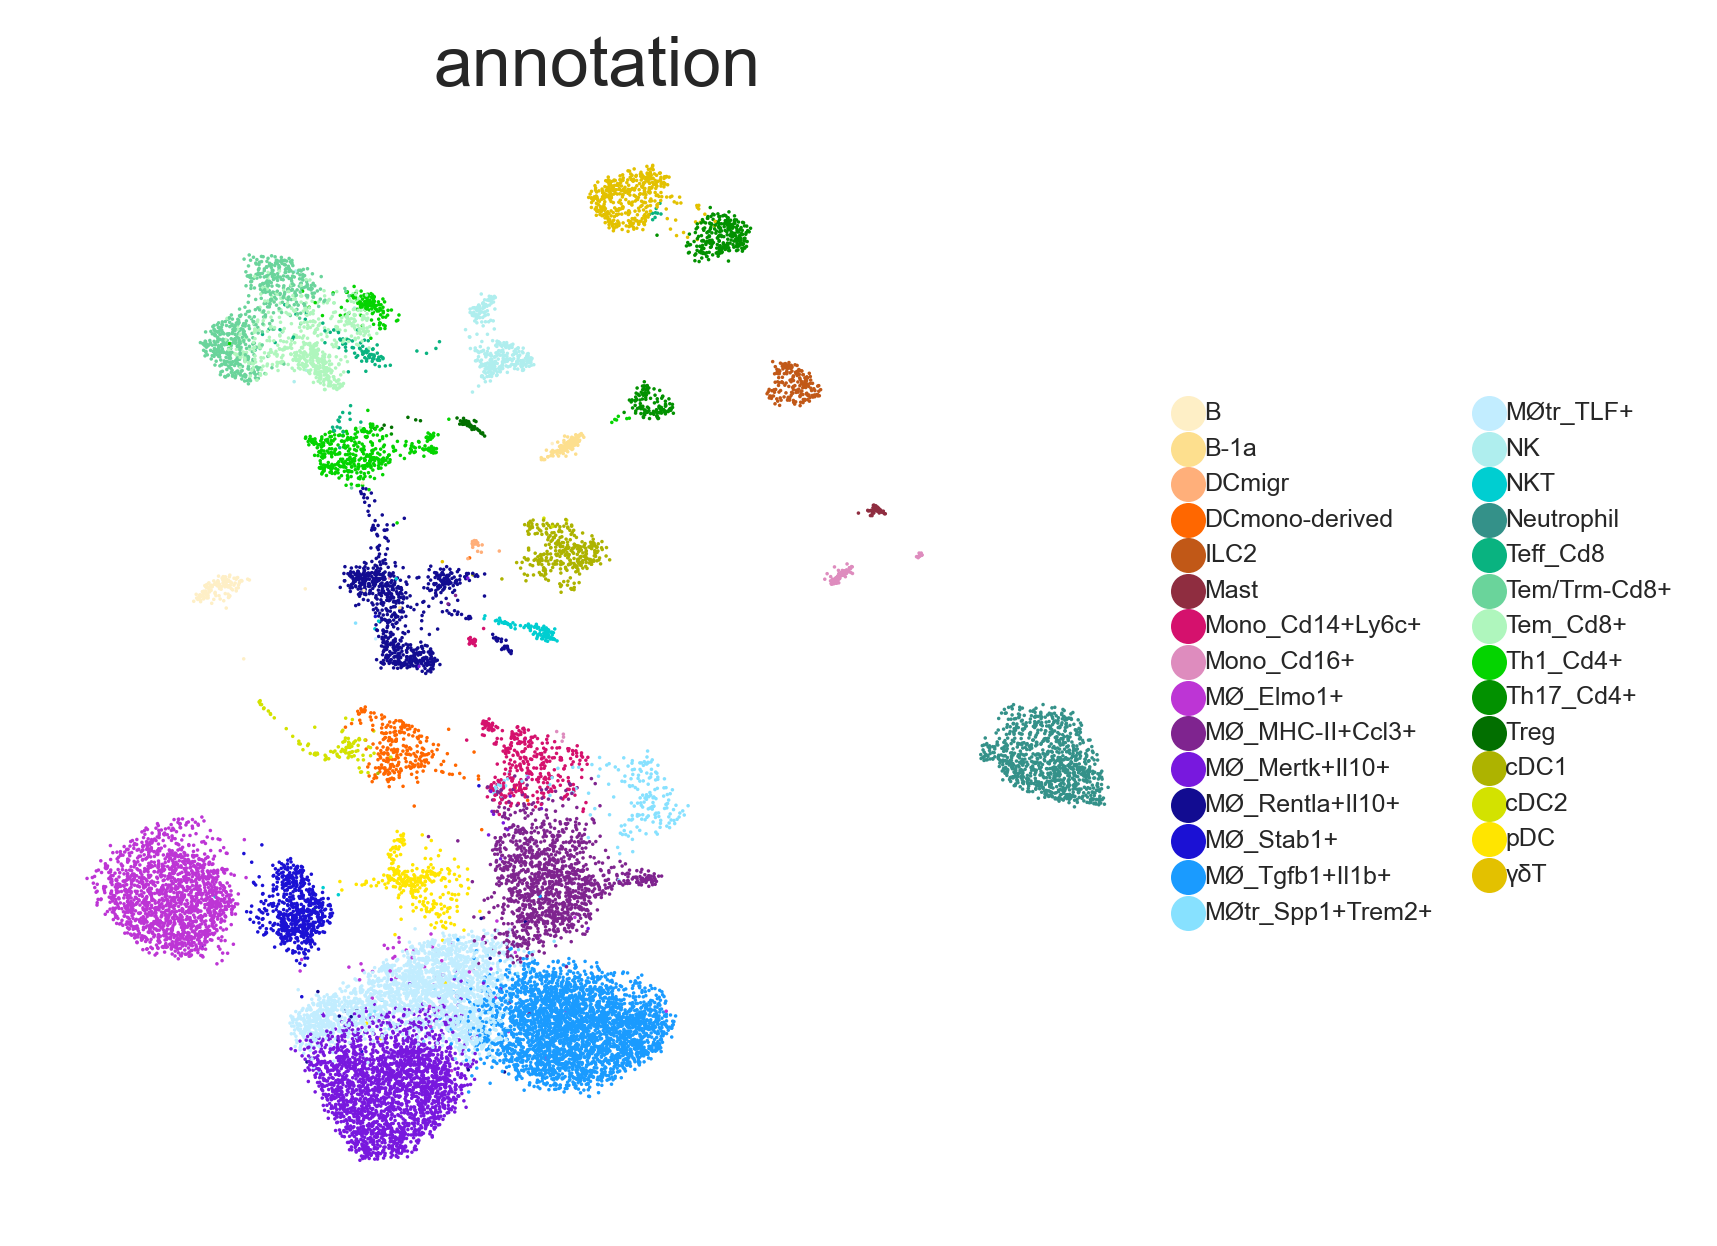

In [22]:
sc.pl.umap(adata, color=['annotation'], size = 2, frameon = False,legend_fontsize = 5, palette= {  
    'B':                    '#FEEFC6',  # Blanched Almond yellow
    'B-1a':                 '#FDDF8E',  # Cream Brulee yellow
    'DCmigr':               '#FFAF7A',  # Salmon
    'DCmono-derived':       '#FF6700',  # Safety Orange
    'ILC2':                 '#C15817',  # Red Fox
    'Mast':                 '#8F2D40',  # Dark Berry   
    'Mono_Cd14+Ly6c+':      '#D5116D',  # Pink           
    'Mono_Cd16+':           '#DE8CBE',  # Rosa
    'MØ_Elmo1+':            '#BD35D5',  # Purple   
    'MØ_MHC-II+Ccl3+':      '#7F248F',  # Dark Purple   
    'MØ_Mertk+Il10+':       '#7818DE',  # Blue Purple  
    'MØ_Rentla+Il10+':      '#120C91',  # Dark Blue  
    'MØ_Stab1+':            '#1B11D4',  # Blue    
    'MØ_Tgfb1+Il1b+':       '#1A9BFF',  # Middle Blue 
    'MØtr_Spp1+Trem2+':     '#87E1FF',  # Light Blue                        
    'MØtr_TLF+':            '#C2EDFF',  # Pale Blue          
    'NK':                   '#AFEEEE',  # Pale Turquoise                     
    'NKT':                  '#00CED1',  # Dark Turquoise                 
    'Neutrophil':           '#349189',  # Very Dark Turquoise   
    'Teff_Cd8':             '#09B380',  # Blueish Green              
    'Tem/Trm-Cd8+':         '#6AD49B',  # Pale Green 
    'Tem_Cd8+':             '#AFF6BD',  # Pastel Green                                       
    'Th1_Cd4+':             '#04D400',  # Green
    'Th17_Cd4+':            '#029100',  # Dark Green         
    'Treg':                 '#026F00',  # Very Dark Green   
    'cDC1':                 '#ADB300',  # Green Yellow
    'cDC2':                 '#D3E200',  # Green Yellow Light          
    'pDC':                  '#FFE500',  # Mango         
    'γδT':                  '#E3C100',  # Dirty Gold
           })  

In [23]:
X_data = adata.X.copy()
X_data_sparse = csr_matrix(X_data)
X_data_df = pd.DataFrame.sparse.from_spmatrix(X_data_sparse, index=adata.obs.index, columns=adata.var.index)
print("Shape of counts DataFrame:", X_data_df.shape)
X_data_df

Shape of counts DataFrame: (18362, 29378)


,Xkr4,Gm1992,Gm19938,Gm37381,Rp1,Sox17,Gm37587,Gm37323,Mrpl15,Lypla1,...,Vmn2r122,Il11ra2-1,Ccl27a-1,Ccl21c-1,Ccl27a-2,Il11ra2-2,Ccl19-1,Ccl21a-1,Gm10931,Gm16367
AAACGCTGTTGTGTTG-1-A1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AAACGCTTCTCGCTCA-1-A1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AAAGGTACAGAACATA-1-A1,0,0,0,0,0,0,0,0,0,3.0,...,0,0,0,0,0,0,0,0,0,0
AAAGTCCAGGGACACT-1-A1,0,0,0,0,0,0,0,0,1.0,2.0,...,0,0,0,0,0,0,0,0,0,0
AAAGTCCCAGTAGGAC-1-A1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTCACAAGCTAAACA-1-B2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TTTCACAGTCCGAAGA-1-B2,0,0,0,0,0,0,0,0,1.0,0,...,0,0,0,0,0,0,0,0,0,0
TTTCGATTCGGTCACG-1-B2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TTTGACTTCAGATTGC-1-B2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
def X_is_raw(adata): return np.array_equal(adata.X.sum(axis=0).astype(int), adata.X.sum(axis=0))

X_is_raw(adata)

True

In [27]:
mdata_data.mod['rna'] = adata
mdata_data

MuData object with n_obs × n_vars = 44586 × 29477
  var:	'gene_ids', 'feature_types'
  2 modalities
    rna:	18362 x 29378
      obs:	'cell_source', 'donor', 'n_counts', 'sample', 'condition', 'genotype', 'infection', 'library', 'model', 'n_genes_by_counts', 'total_counts', 'doublet_scores', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'percent_mt', 'percent_chrY', 'XIST-counts', 'S_score', 'G2M_score', '_scvi_batch', '_scvi_labels', 'batch', 'leiden', 'classification', 'phenotype', 'annotation', 'lineage', 'general_celltype'
      var:	'gene_ids', 'feature_types', 'mt', 'ribo'
      uns:	'annotation_colors'
      obsm:	'X_pca', 'X_scANVI', 'X_scVI', 'X_umap', '_scvi_extra_categorical_covs'
      obsp:	'connectivities', 'distances'
    prot:	44586 x 99
      obs:	'library', 'batch', 'lineage'
      var:	'gene_ids', 'feature_types'
      uns:	'neighbors', 'pca', 'umap'
      obsm:	'X_pca', 'X_umap'
      varm:	'PCs'
      layers:	'counts', 'log_norm'

In [28]:
rna_cells_export = set(mdata_data.mod['rna'].obs_names)
mask = mdata_data.mod['prot'].obs_names.isin(rna_cells_export)
filtered_prot_export = mdata_data.mod['prot'][mask]
mdata = mu.MuData({"rna": mdata_data.mod['rna'], "prot": filtered_prot_export})
mdata_data

MuData object with n_obs × n_vars = 44586 × 29477
  var:	'gene_ids', 'feature_types'
  2 modalities
    rna:	18362 x 29378
      obs:	'cell_source', 'donor', 'n_counts', 'sample', 'condition', 'genotype', 'infection', 'library', 'model', 'n_genes_by_counts', 'total_counts', 'doublet_scores', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'percent_mt', 'percent_chrY', 'XIST-counts', 'S_score', 'G2M_score', '_scvi_batch', '_scvi_labels', 'batch', 'leiden', 'classification', 'phenotype', 'annotation', 'lineage', 'general_celltype'
      var:	'gene_ids', 'feature_types', 'mt', 'ribo'
      uns:	'annotation_colors'
      obsm:	'X_pca', 'X_scANVI', 'X_scVI', 'X_umap', '_scvi_extra_categorical_covs'
      obsp:	'connectivities', 'distances'
    prot:	44586 x 99
      obs:	'library', 'batch', 'lineage'
      var:	'gene_ids', 'feature_types'
      uns:	'neighbors', 'pca', 'umap'
      obsm:	'X_pca', 'X_umap'
      varm:	'PCs'
      layers:	'counts', 'log_norm'

In [30]:
mdata.write('/Users/alex/github/ACM_Mouse_Immune/Workflow/5_Leiden_clustering+annotation_on_all_conditions/C_merge_lymphoids+myeloids/A4_MCMV_project_data_ac241213.raw.h5mu')

/Users/alex/miniforge3/envs/milopy/lib/python3.10/site-packages/anndata/_core/anndata.py:1209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[key] = c


In [31]:
adata.write('/Users/alex/github/ACM_Mouse_Immune/Workflow/5_Leiden_clustering+annotation_on_all_conditions/C_merge_lymphoids+myeloids/A4_MCMV_project_data_only-RNA_ac241213.raw.h5ad')

In [32]:
protein = mdata_data.mod['prot']
protein

AnnData object with n_obs × n_vars = 44586 × 99
    obs: 'library', 'batch', 'lineage'
    var: 'gene_ids', 'feature_types'
    uns: 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'counts', 'log_norm'

In [33]:
protein.write('/Users/alex/github/ACM_Mouse_Immune/Workflow/5_Leiden_clustering+annotation_on_all_conditions/C_merge_lymphoids+myeloids/A4_MCMV_project_data_only-protein_ac241213.raw.h5ad')